In [38]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
x = np.random.uniform(-3, 3, size=100)
x = x.reshape(-1, 1)
x.size

100

In [40]:
y = 0.5 * (x**2) + x + 2 +np.random.normal(0 ,1,size=100).reshape(-1,1)

y.size


100

<function matplotlib.pyplot.show(*args, **kw)>

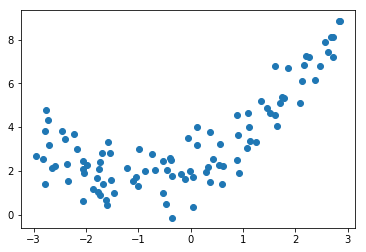

In [41]:
plt.scatter(x,y)
plt.show 

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_predict = lin_reg.predict(x)

<function matplotlib.pyplot.show(*args, **kw)>

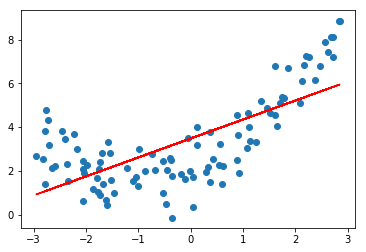

In [44]:
plt.scatter(x,y)
plt.plot(x, y_predict,color='r')
plt.show 

In [45]:
x2 = np.hstack([x,x**2])

In [46]:
x2.shape

(100, 2)

In [47]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x2 , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [48]:
y_predict2 = lin_reg2.predict(x2)


<function matplotlib.pyplot.show(*args, **kw)>

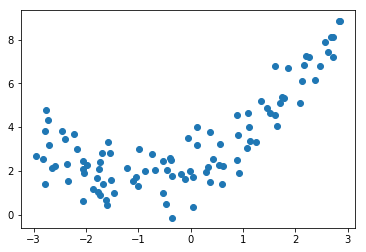

In [49]:


plt.scatter(x,y)
# plt.plot(np.sort(x), y_predict2[np.argsort(x.reshape(1,-1))[0]],color='r')
plt.show 

In [50]:
lin_reg2.coef_

array([[0.94586799, 0.47063002]])

# scikit-learn中多项式回归

In [51]:
 from sklearn.preprocessing import PolynomialFeatures

In [52]:
poly = PolynomialFeatures(degree=2)
poly.fit(x)
x2 = poly.transform(x)

In [53]:
x2.shape

(100, 3)

In [54]:
x2[:5,:]

array([[ 1.        ,  1.52093098,  2.31323106],
       [ 1.        ,  0.29445303,  0.08670259],
       [ 1.        ,  0.36272194,  0.13156721],
       [ 1.        ,  1.60263302,  2.56843259],
       [ 1.        , -1.73526617,  3.01114868]])

In [55]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x2 , y)
y_predict2 = lin_reg.predict(x2)

In [56]:
lin_reg.coef_

array([[0.        , 0.94586799, 0.47063002]])

In [57]:
# lin_reg.

# Pipeline

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

poly_reg = Pipeline([
    ("poly",PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
     
])

In [59]:
poly_reg.fit(x,y)
y_predict = poly_reg.predict(x)

# 过拟合和欠拟合

In [60]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(666)
x = np.random.uniform(-3.0, 3.0, size=100)
x = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 +np.random.normal(0, 1, size=100).reshape(-1,1)


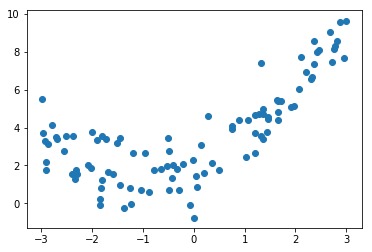

In [61]:
plt.scatter(x, y)
plt.show()

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [74]:
 def PolynomialRegression(degree):
    return Pipeline([
    ("poly",PolynomialFeatures(degree=degree)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
]) 




In [75]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(x_train, y_train)
y2_predit = poly2_reg.predict(x_test)
mean_squared_error(y_test, y2_predit)

2


1.2326602482779312

In [77]:
poly10_reg = PolynomialRegression(degree=10)
poly10_reg.fit(x_train, y_train)
y10_predit = poly10_reg.predict(x_test)
mean_squared_error(y_test, y10_predit)

10


1.5894157007080858

In [78]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(x_train, y_train)
y100_predit = poly100_reg.predict(x_test)
mean_squared_error(y_test, y100_predit)

100


5.581401624808677e+17

# 学习曲线

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state =10)

(80, 1)

# 交叉验证 

In [29]:
from sklearn import datasets
digits = datasets.load_digits()
x = digits.data
y = digits.target

### 测试train_test_split调整超参数

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

best_score, best_p, best_k =0, 0, 0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=k,p=p)
        knn_clf.fit(x_train, y_train)
        score = knn_clf.score(x_test, y_test)
        if score >best_score:
            best_score, best_p, best_k =score, p, k 
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 9
Best P = 5
Best Score = 0.9861111111111112


### 使用交叉验证调整超参数

In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [33]:
knn_clf = KNeighborsClassifier()
cross_val_score(knn_clf, x_train, y_train)

array([0.98336798, 0.98329854, 0.97903564])

In [34]:
best_score, best_p, best_k =0, 0, 0
for k in range(2,11):
    for p in range(1,6):
        knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=k,p=p)
        scores = cross_val_score(knn_clf, x_train, y_train,cv=3)
        score = np.mean(scores)
        if score >best_score:
            best_score, best_p, best_k =score, p, k 
print("Best K =", best_k)
print("Best P =", best_p)
print("Best Score =", best_score)

Best K = 2
Best P = 2
Best Score = 0.9860877569941264


In [35]:
best_knn_clf = KNeighborsClassifier(weights="distance",n_neighbors=2,p=3)
best_knn_clf.fit(x_train, y_train)
best_knn_clf.score(x_test, y_test)

0.9805555555555555

### 网格搜索采用交叉验证